# Z-Profile examples

### Submitted to SDM 2022

In [1]:
from zprofile import profiling, syntheticGenerator, utils
import matplotlib.pyplot as plt

### 0. Parameter assignments

In [2]:
# SYNTHETIC GENERATOR
# For details, please refer to the supplementary material.
tc = 50
tl = 365
c = 20
no_outliers = 10
outlier_size = 10

# PROFILE GENERATION
n_bins = 5
alpha = 0.9
eta = 1.5

### 1. Create a synthetic dataset using the synthetic dataset generator

In [3]:
X_raw, y = syntheticGenerator.createSyntheticData(tc = tc, tl=tl, c = c, no_outliers = no_outliers, outlier_size=outlier_size)

Example of the synthetic dataset

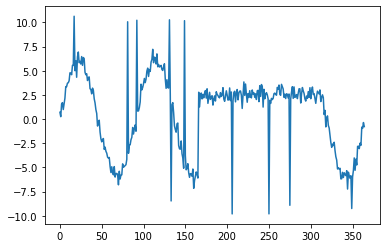

In [4]:
plt.plot(X_raw[0])

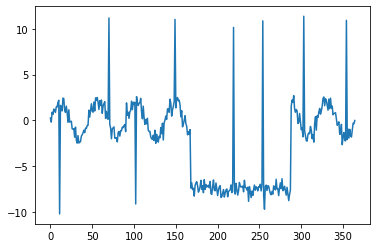

In [5]:
plt.plot(X_raw[150])

### 2. Apply z-normalization on X_raw to create a normalized dataset

In [6]:
X = utils.znorm(X_raw)

### 3. Apply symbolic aggregate approximation to create event sequences

 - glob = global level SAX (default), we collect all the values first and make the boundaries based on the global distribution so that all the values can be abstracted based on the same criteria.
 

In [7]:
X_sax = utils.SAXify(X, n_bins = 5, glob=True)

Example of the event sequence, a collection of abstracted event labels

In [8]:
X_sax[200]

array([1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

Example of the raw dataset and the abstracted dataset (event sequence)

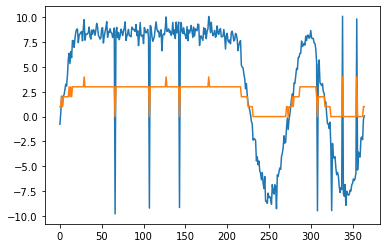

In [9]:
plt.plot(X_raw[200])
plt.plot(X_sax[200])
plt.show()

### 4. Create channels for profile generation

In [10]:
matrices = utils.createChannels(X_sax)

### 5. Create profiles without global class information
- In this case, the algorithm does not perform quality validation of each profile but returns all profiles it found.
- Section 6 of this example notebook explains the way of performing quality validation.

In [11]:
profiles, chains = profiling.createProfiles(matrices, alpha=alpha, accept=False, debug=True)

[DEBUG] BEGIN Profile generation
[DEBUG] Profiles for one letter - time taken: 15.572395067999999
[DEBUG] Profiles for one letter - time taken: 10.942493171000002
[DEBUG] Profiles for one letter - time taken: 7.658472540000005
[DEBUG] Profiles for one letter - time taken: 10.842127372999997
[DEBUG] Profiles for one letter - time taken: 10.608475378000001
[DEBUG] FINISH Profile generation
[DEBUG] BEGIN Profile chain generation
[FINISH] BEGIN Profile chain generation
[DEBUG] BEGIN Profile acceptance check and gap fix
[DEBUG] FINISH Profile acceptance check and gap fix


An example of the profile (members in the time series and its range).

In [13]:
profiles

[{'members': array([ True,  True,  True,  True,  True, False, False, False, False,
          True, False, False,  True, False, False, False, False, False,
         False, False, False,  True,  True, False, False,  True, False,
         False, False,  True, False, False,  True,  True, False, False,
         False, False, False, False,  True, False,  True,  True, False,
         False, False, False,  True, False, False, False, False, False,
         False,  True,  True, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False,  True, False, False, False, False,
         False, False, False,  True,  True,  True,  True,  True,  True,
          True, False,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  T

An example of the profile chain (members in the time series and its range)

In [16]:
len(profiles)

34

In [15]:
len(chains)

39

In [13]:
chains[2]

{'members': array([ True,  True,  True,  True,  True, False,  True,  True, False,
         True,  True, False,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True, False,
         True, False,  True, False,  True,  True,  True,  True, False,
        False,  True, False,  True,  True,  True,  True,  True,  True,
         True, False, False,  True, False, False,  True,  True,  True,
         True, False, False,  True, False, False, False, False, False,
        False,  True, False, False,  True, False, False,  True, False,
         True, False,  True, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False,  True, False, False, False, False, False,  True, False,
        False,  True,  True,  True, False,  True,  True, False,  True,
         True, False,  True,  True,  True, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  T

### 6. Create profiles with global class information - quality validation
- This line performs a profile generation process with the validity score (Please refer to "Step 4 - Profile quality validation" in the paper).
- We can turn this option on by putting the 'accept' option as `True`.
- The example checks whether the tiles have enough class of 0 to accept each profile as a relevant one.

In [20]:
matrices[0].shape[1]

365

In [13]:
y[0]

0

In [14]:
profiles, chains = profiling.createProfiles(matrices, metas = y, c = y[0], alpha=alpha, eta=eta, accept=True, debug=True)

[DEBUG] BEGIN Profile generation
[DEBUG] Profiles for one letter - time taken: 15.665372854999987
[DEBUG] Profiles for one letter - time taken: 11.659322121999992
[DEBUG] Profiles for one letter - time taken: 10.672745685999999
[DEBUG] Profiles for one letter - time taken: 12.545443860000006
[DEBUG] Profiles for one letter - time taken: 16.474068727000002
[DEBUG] BEGIN Profile chain generation


Now the profile also has an additional information: the classes related to our target class (c).

In [15]:
profiles[0]

{'members': array([ True,  True, False,  True,  True,  True,  True, False, False,
        False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True, False,  True, False,  True,
         True, False,  True, False,  True, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False,  True, False, False, False, False,
        False,  True, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False, False,  True, False,
         True,  True,  True,  True,  True, False,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  T